In [44]:
import pandas as pd

In [45]:
df= pd.read_csv("../CRIS_data/train_demand/demand_22222.csv")
df.head()

,'booking_date','journey_date','trnno','brdpt_code','resupto_code','cls','PSGN'
0,2023-04-06,2023-08-01,'22222','AGC ','KYN ','3A ',6
1,2023-04-14,2023-08-01,'22222','NZM ','NK ','3A ',1
2,2023-05-02,2023-08-01,'22222','NZM ','CSMT','1A ',4
3,2023-05-03,2023-08-01,'22222','NZM ','NK ','2A ',2
4,2023-05-14,2023-08-01,'22222','NZM ','NK ','3A ',1


In [46]:
df.shape

(384534, 7)

In [47]:
df.columns = df.columns.str.strip().str.strip("'")
cols_to_clean = ['brdpt_code', 'resupto_code', 'cls', 'trnno']
for col in cols_to_clean:
    df[col] = df[col].str.strip().str.strip("'")
    df[col] = df[col].str.strip()

df.head()

,booking_date,journey_date,trnno,brdpt_code,resupto_code,cls,PSGN
0,2023-04-06,2023-08-01,22222,AGC,KYN,3A,6
1,2023-04-14,2023-08-01,22222,NZM,NK,3A,1
2,2023-05-02,2023-08-01,22222,NZM,CSMT,1A,4
3,2023-05-03,2023-08-01,22222,NZM,NK,2A,2
4,2023-05-14,2023-08-01,22222,NZM,NK,3A,1


In [48]:
(df["brdpt_code"].unique())

array(['AGC', 'NZM', 'VGLJ', 'GWL', 'JL', 'BPL', 'NK', 'KYN', 'BSL'],
      dtype=object)

In [49]:
df["resupto_code"].unique()

array(['KYN', 'NK', 'CSMT', 'VGLJ', 'JL', 'BPL', 'GWL', 'AGC', 'BSL'],
      dtype=object)

In [50]:
print(df["journey_date"].value_counts())
print(df['journey_date'].dtype)


journey_date
2024-11-03    763
2024-08-19    739
2024-12-14    733
2025-01-04    721
2025-03-16    714
             ... 
2023-10-10    354
2023-10-18    351
2023-09-21    347
2024-10-31    256
2023-11-12    251
Name: count, Length: 731, dtype: int64
object


In [51]:
pd.to_datetime(df['journey_date'])
pd.to_datetime(df['booking_date'])

0        2023-04-06
1        2023-04-14
2        2023-05-02
3        2023-05-03
4        2023-05-14
            ...    
384529   2025-08-01
384530   2025-08-01
384531   2025-08-01
384532   2025-08-01
384533   2025-08-01
Name: booking_date, Length: 384534, dtype: datetime64[ns]

In [52]:
df["PSGN"].describe()


count    384534.000000
mean          3.087672
std           4.497931
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         209.000000
Name: PSGN, dtype: float64

In [62]:

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates # Add this line


(18, 7)


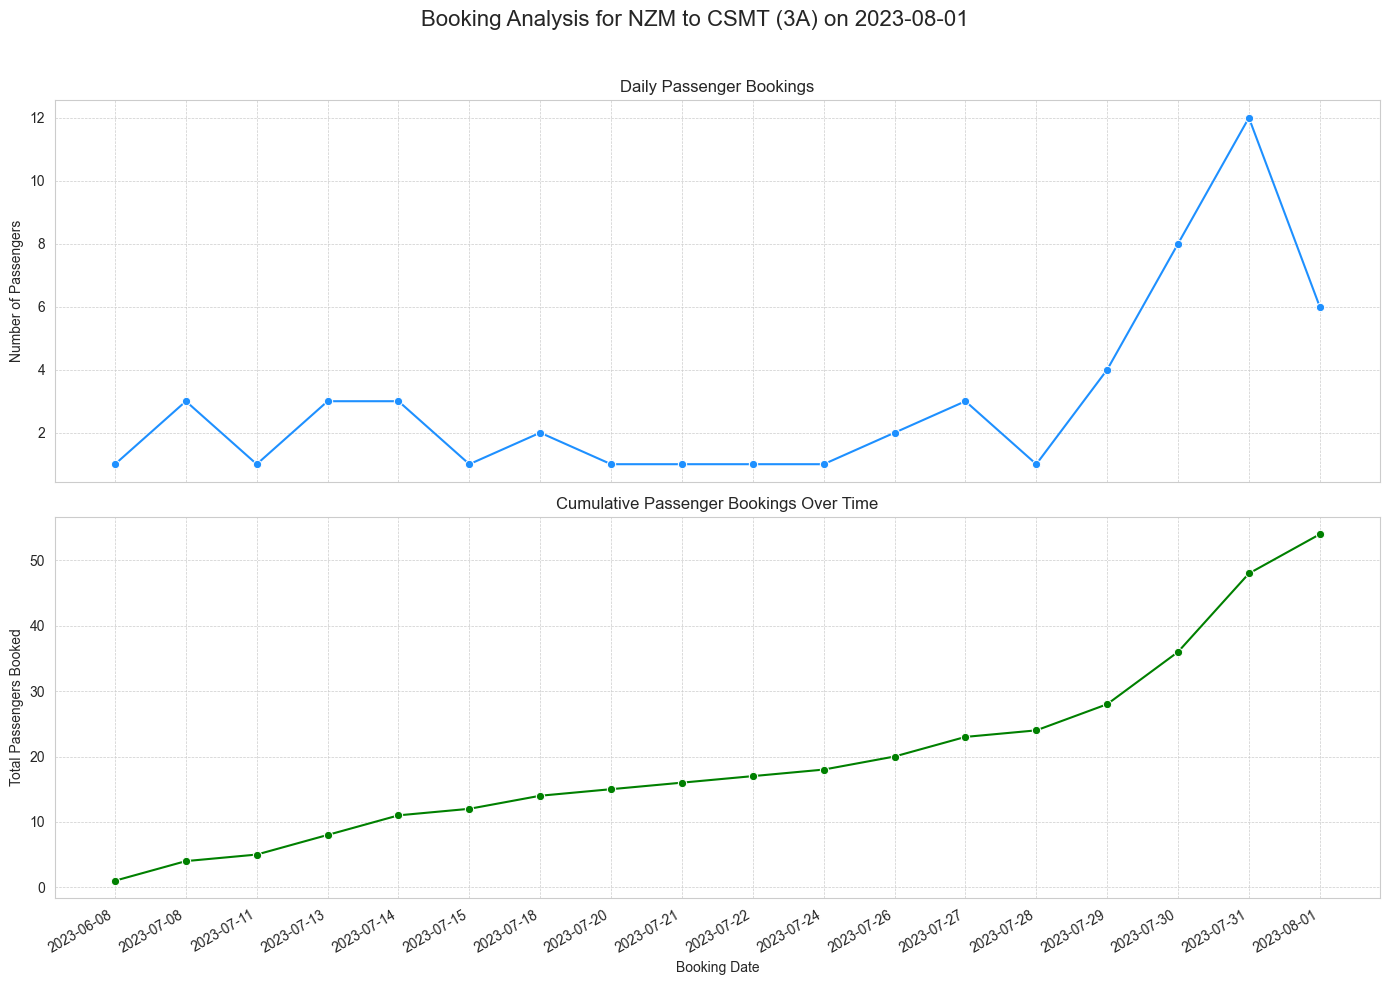

In [72]:


# 1. --- Define and filter for the specific journey ---
# Change these values to analyze the journey you are interested in.
journey_date_filter = '2023-08-01'
brdpt_code_filter = 'NZM'
resupto_code_filter = 'CSMT'
cls_filter = '3A'

# Apply the filters
journey_df = df[
    (df['journey_date'] == journey_date_filter) &
    (df['brdpt_code'] == brdpt_code_filter) &
    (df['resupto_code'] == resupto_code_filter) &
    (df['cls'] == cls_filter)
].copy()

print(journey_df.shape)
# 2. --- Prepare the data for plotting ---
# Sort the data by booking date to ensure the cumulative sum is correct
journey_df = journey_df.sort_values(by='booking_date')

# Calculate the cumulative sum of passengers
journey_df['cumulative_psgn'] = journey_df['PSGN'].cumsum()

# 3. --- Visualize the data ---
# 3. --- Visualize the data ---
# Set a nice plot style
sns.set_style("whitegrid")

# Create a figure with two subplots stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Title for the entire figure
fig.suptitle(f'Booking Analysis for {brdpt_code_filter} to {resupto_code_filter} ({cls_filter}) on {journey_date_filter}', fontsize=16)

# Plot 1: Daily Passenger Bookings (PSGN vs. Booking Date) - NOW INVISIBLE
sns.lineplot(ax=axes[0], x='booking_date', y='PSGN', data=journey_df, marker='o', color='dodgerblue')
axes[0].set_title('Daily Passenger Bookings')
axes[0].set_ylabel('Number of Passengers')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)


# Plot 2: Cumulative Passenger Bookings vs. Booking Date - NOW INVISIBLE
sns.lineplot(ax=axes[1], x='booking_date', y='cumulative_psgn', data=journey_df, marker='o', color='green')
axes[1].set_title('Cumulative Passenger Bookings Over Time')
axes[1].set_xlabel('Booking Date')
axes[1].set_ylabel('Total Passengers Booked')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
# date_format = mdates.DateFormatter('%d-%b')
# axes[1].xaxis.set_major_formatter(date_format)

# 2. Rotate the labels for better spacing
plt.setp(axes[1].get_xticklabels(), rotation=30, ha="right")

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.96]) 

# Make sure to uncomment this line to see the plot
plt.show()

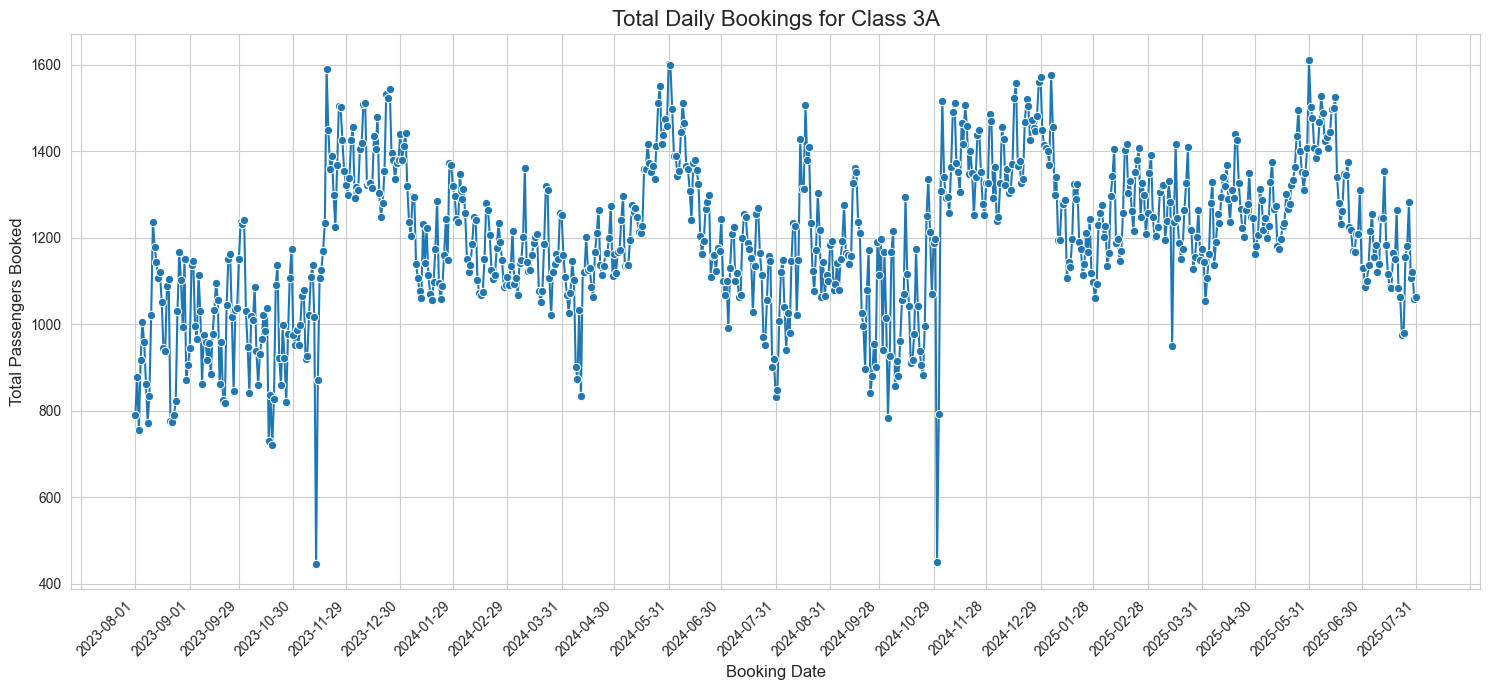

In [91]:
# 1. --- Filter the DataFrame for only class '3A' ---
df_3A = df[df['cls'] == '3A'].copy()


# 2. --- Group by journey date and sum the passengers ---
# This creates a new DataFrame with the total passengers for each day
daily_journey_df = df_3A.groupby('journey_date')['PSGN'].sum().reset_index()
daily_journey_df.rename(columns={'PSGN': 'total_psgn'}, inplace=True)


plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")

# Create the line plot
plot = sns.lineplot(
    x='journey_date',
    y='total_psgn',
    data=daily_journey_df,
    marker='o'
)

# Set titles and labels
plot.set_title('Total Daily Bookings for Class 3A', fontsize=16)
plot.set_xlabel('Booking Date', fontsize=12)
plot.set_ylabel('Total Passengers Booked', fontsize=12)

plot.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))

# 2. (Optional but recommended) Format the date to be clean, e.g., "01-Aug"
# plot.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

# 3. (Optional but recommended) Rotate the labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


